# Support Vector Regression (SVR)

## Importing the libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [61]:
dataset = pd.read_csv('./Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values

In [62]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [63]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [65]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [66]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [67]:
from sklearn.svm import SVR
regressor = SVR(kernel= 'rbf')
regressor.fit(X, y)

/Users/kingchan818/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Predicting a new result

In [68]:
y_pred = regressor.predict(sc_X.transform([[6.5]]))
pred = sc_y.inverse_transform(y_pred)
print(pred)

[170370.0204065]


## Visualising the SVR results

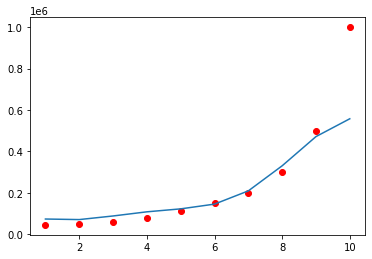

In [74]:
x_def = sc_X.inverse_transform(X)
y_def = sc_y.inverse_transform(y)
plt.scatter(x_def,y_def, color='red')
plt.plot(x_def,sc_y.inverse_transform(regressor.predict(X)))
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

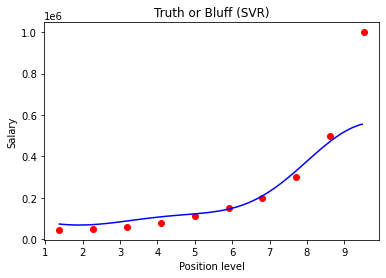

In [79]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()